<h1> <center> 06 </center> </h1> 

*Objective** : Data Preprocessing techniques on structured data
- Students will learn to prepare raw dataset for Data Mining process
1. Managing dataset Attributes
2. Imputing Missing Values
3. Handling inappropriate data types
4. Remove Duplicate samples from the dataset
5. Scale the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../input/fortune500-19552005/fortune500.csv')
print('Length of Fortune500 dataset is "', len(df), '" samples')
print()
df.head()

Length of Fortune500 dataset is " 25500 " samples



,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [3]:
# df[:499]

## 1. Managing dataset Attributes

In [4]:
df.columns

Index(['Year', 'Rank', 'Company', 'Revenue (in millions)',
       'Profit (in millions)'],
      dtype='object')

In [5]:
# To Rename the Columns
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']
df.head(2)

,year,rank,company,revenue,profit
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8


#### To rename a single column

In [6]:
# to rename a single column
df.rename(columns={'profit':'pf'}, inplace=True)
df.head(2)

,year,rank,company,revenue,pf
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8


In [7]:
# revert back the attributes
df.rename(columns={'pf':'profit'}, inplace=True)
df.head(1)

,year,rank,company,revenue,profit
0,1955,1,General Motors,9823.5,806


In [8]:
df.columns

Index(['year', 'rank', 'company', 'revenue', 'profit'], dtype='object')

## 2. Handling Missing Values in Structured Data
- Most of the Machine Learning Algorithms cannot work with missing values in the features

In [9]:
import os
os.listdir('/kaggle/input')

['lab06-demo-dataset', 'fortune500-19552005']

In [10]:
# read in sample data
dfnew = pd.read_csv('../input/lab06-demo-dataset/lab06_data.txt', sep=',')
dfnew

,first,second,third,fourth,fifth,sixth
0,10.0,100.0,200,NaN,400.0,500
1,11.0,102.0,203,305.0,410.0,505
2,NaN,104.0,210,308.0,414.0,514
3,13.0,110.0,202,313.0,NaN,520
4,12.0,NaN,207,300.0,400.0,500
5,15.0,100.0,210,305.0,408.0,520
6,20.0,118.0,212,325.0,417.0,535
7,21.0,121.0,222,333.0,444.0,555
8,20.0,118.0,212,325.0,417.0,535
9,21.0,121.0,222,333.0,444.0,555


In [11]:
print(len(dfnew))
print()
print(dfnew.isnull().sum())

10

first     1
second    1
third     0
fourth    1
fifth     1
sixth     0
dtype: int64


#### Method 01: Drop all those data samples having Missing values

##### Droping row(s)

In [12]:
dfnew.dropna(subset=['fourth'], inplace=True)
dfnew

,first,second,third,fourth,fifth,sixth
1,11.0,102.0,203,305.0,410.0,505
2,NaN,104.0,210,308.0,414.0,514
3,13.0,110.0,202,313.0,NaN,520
4,12.0,NaN,207,300.0,400.0,500
5,15.0,100.0,210,305.0,408.0,520
6,20.0,118.0,212,325.0,417.0,535
7,21.0,121.0,222,333.0,444.0,555
8,20.0,118.0,212,325.0,417.0,535
9,21.0,121.0,222,333.0,444.0,555


In [13]:
len(dfnew)

9

In [14]:
dfnew.dropna(inplace=True)
dfnew

,first,second,third,fourth,fifth,sixth
1,11.0,102.0,203,305.0,410.0,505
5,15.0,100.0,210,305.0,408.0,520
6,20.0,118.0,212,325.0,417.0,535
7,21.0,121.0,222,333.0,444.0,555
8,20.0,118.0,212,325.0,417.0,535
9,21.0,121.0,222,333.0,444.0,555


In [15]:
print("New length of the dataset after dropping missing values: ", len(dfnew))

New length of the dataset after dropping missing values:  6


##### Droping column(s)

In [16]:
dfnew = pd.read_csv('../input/lab06-demo-dataset/lab06_data.txt', sep=',')
dfnew

,first,second,third,fourth,fifth,sixth
0,10.0,100.0,200,NaN,400.0,500
1,11.0,102.0,203,305.0,410.0,505
2,NaN,104.0,210,308.0,414.0,514
3,13.0,110.0,202,313.0,NaN,520
4,12.0,NaN,207,300.0,400.0,500
5,15.0,100.0,210,305.0,408.0,520
6,20.0,118.0,212,325.0,417.0,535
7,21.0,121.0,222,333.0,444.0,555
8,20.0,118.0,212,325.0,417.0,535
9,21.0,121.0,222,333.0,444.0,555


In [17]:
dfnew.drop("sixth", axis=1, inplace=True)
dfnew

,first,second,third,fourth,fifth
0,10.0,100.0,200,NaN,400.0
1,11.0,102.0,203,305.0,410.0
2,NaN,104.0,210,308.0,414.0
3,13.0,110.0,202,313.0,NaN
4,12.0,NaN,207,300.0,400.0
5,15.0,100.0,210,305.0,408.0
6,20.0,118.0,212,325.0,417.0
7,21.0,121.0,222,333.0,444.0
8,20.0,118.0,212,325.0,417.0
9,21.0,121.0,222,333.0,444.0


#### Method 02: Replace missing values with "Average Values" of that particular Attribute

##### Mean( )

In [18]:
# read in sample data
dfnew = pd.read_csv('../input/lab06-demo-dataset/lab06_data.txt', sep=',')
dfnew

,first,second,third,fourth,fifth,sixth
0,10.0,100.0,200,NaN,400.0,500
1,11.0,102.0,203,305.0,410.0,505
2,NaN,104.0,210,308.0,414.0,514
3,13.0,110.0,202,313.0,NaN,520
4,12.0,NaN,207,300.0,400.0,500
5,15.0,100.0,210,305.0,408.0,520
6,20.0,118.0,212,325.0,417.0,535
7,21.0,121.0,222,333.0,444.0,555
8,20.0,118.0,212,325.0,417.0,535
9,21.0,121.0,222,333.0,444.0,555


In [19]:
dfnew.fillna(dfnew.mean(), inplace=True)
dfnew

,first,second,third,fourth,fifth,sixth
0,10.000000,100.000000,200,316.333333,400.000000,500
1,11.000000,102.000000,203,305.000000,410.000000,505
2,15.888889,104.000000,210,308.000000,414.000000,514
3,13.000000,110.000000,202,313.000000,417.111111,520
4,12.000000,110.444444,207,300.000000,400.000000,500
5,15.000000,100.000000,210,305.000000,408.000000,520
6,20.000000,118.000000,212,325.000000,417.000000,535
7,21.000000,121.000000,222,333.000000,444.000000,555
8,20.000000,118.000000,212,325.000000,417.000000,535
9,21.000000,121.000000,222,333.000000,444.000000,555


##### Median( )

In [20]:
dfnew = pd.read_csv('../input/lab06-demo-dataset/lab06_data.txt', sep=',')
dfnew.head()

,first,second,third,fourth,fifth,sixth
0,10.0,100.0,200,NaN,400.0,500
1,11.0,102.0,203,305.0,410.0,505
2,NaN,104.0,210,308.0,414.0,514
3,13.0,110.0,202,313.0,NaN,520
4,12.0,NaN,207,300.0,400.0,500


In [21]:
# median = dfnew["first"].median()
dfnew["first"].fillna(dfnew['first'].median(), inplace=True)
dfnew["second"].fillna(dfnew['second'].median(), inplace=True)
dfnew

,first,second,third,fourth,fifth,sixth
0,10.0,100.0,200,NaN,400.0,500
1,11.0,102.0,203,305.0,410.0,505
2,15.0,104.0,210,308.0,414.0,514
3,13.0,110.0,202,313.0,NaN,520
4,12.0,110.0,207,300.0,400.0,500
5,15.0,100.0,210,305.0,408.0,520
6,20.0,118.0,212,325.0,417.0,535
7,21.0,121.0,222,333.0,444.0,555
8,20.0,118.0,212,325.0,417.0,535
9,21.0,121.0,222,333.0,444.0,555


#### Filling with "Zeros"

In [3]:
import pandas as pd

In [4]:
dfnew = pd.read_csv('../input/lab06-demo-dataset/lab06_data.txt', sep=',')
dfnew

FileNotFoundError: [Errno 2] No such file or directory: '../input/lab06-demo-dataset/lab06_data.txt'

In [5]:
import pandas as pd

In [6]:
dfnew.to_csv('lab06.csv')

NameError: name 'dfnew' is not defined

In [24]:
# For one column using pandas
dfnew['first'] = dfnew['first'].fillna(0)
dfnew

# For one column using numpy
# df['DataFrame Column'] = df['DataFrame Column'].replace(np.nan, 0)

,first,second,third,fourth,fifth,sixth
0,10.0,100.0,200,NaN,400.0,500
1,11.0,102.0,203,305.0,410.0,505
2,0.0,104.0,210,308.0,414.0,514
3,13.0,110.0,202,313.0,NaN,520
4,12.0,NaN,207,300.0,400.0,500
5,15.0,100.0,210,305.0,408.0,520
6,20.0,118.0,212,325.0,417.0,535
7,21.0,121.0,222,333.0,444.0,555
8,20.0,118.0,212,325.0,417.0,535
9,21.0,121.0,222,333.0,444.0,555


In [25]:
#For the whole DataFrame using pandas
dfnew.fillna(0)

# For the whole DataFrame using numpy
# df.replace(np.nan, 0)

,first,second,third,fourth,fifth,sixth
0,10.0,100.0,200,0.0,400.0,500
1,11.0,102.0,203,305.0,410.0,505
2,0.0,104.0,210,308.0,414.0,514
3,13.0,110.0,202,313.0,0.0,520
4,12.0,0.0,207,300.0,400.0,500
5,15.0,100.0,210,305.0,408.0,520
6,20.0,118.0,212,325.0,417.0,535
7,21.0,121.0,222,333.0,444.0,555
8,20.0,118.0,212,325.0,417.0,535
9,21.0,121.0,222,333.0,444.0,555


### Usage of IMPUTER
- SciKit-Learn provides Imputer class to handle missing values with ease. 
- One can use it in the following way:
    1. First, one need to decide the strategy: mean, median, most_frequent
    2. Second, create the imputer instance using the decided strategy

In [26]:
dfnew = pd.read_csv('../input/lab06-demo-dataset/lab06_data.txt', sep=',')
dfnew

,first,second,third,fourth,fifth,sixth
0,10.0,100.0,200,NaN,400.0,500
1,11.0,102.0,203,305.0,410.0,505
2,NaN,104.0,210,308.0,414.0,514
3,13.0,110.0,202,313.0,NaN,520
4,12.0,NaN,207,300.0,400.0,500
5,15.0,100.0,210,305.0,408.0,520
6,20.0,118.0,212,325.0,417.0,535
7,21.0,121.0,222,333.0,444.0,555
8,20.0,118.0,212,325.0,417.0,535
9,21.0,121.0,222,333.0,444.0,555


In [27]:
# 2. Fit the numerical data to Imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(dfnew)
dfnew

,first,second,third,fourth,fifth,sixth
0,10.0,100.0,200,NaN,400.0,500
1,11.0,102.0,203,305.0,410.0,505
2,NaN,104.0,210,308.0,414.0,514
3,13.0,110.0,202,313.0,NaN,520
4,12.0,NaN,207,300.0,400.0,500
5,15.0,100.0,210,305.0,408.0,520
6,20.0,118.0,212,325.0,417.0,535
7,21.0,121.0,222,333.0,444.0,555
8,20.0,118.0,212,325.0,417.0,535
9,21.0,121.0,222,333.0,444.0,555


In [28]:
# 3.
X = imputer.transform(dfnew)
dfnew_tr = pd.DataFrame(X, columns=dfnew.columns, index=dfnew.index)
dfnew_tr

,first,second,third,fourth,fifth,sixth
0,10.0,100.0,200.0,313.0,400.0,500.0
1,11.0,102.0,203.0,305.0,410.0,505.0
2,15.0,104.0,210.0,308.0,414.0,514.0
3,13.0,110.0,202.0,313.0,414.0,520.0
4,12.0,110.0,207.0,300.0,400.0,500.0
5,15.0,100.0,210.0,305.0,408.0,520.0
6,20.0,118.0,212.0,325.0,417.0,535.0
7,21.0,121.0,222.0,333.0,444.0,555.0
8,20.0,118.0,212.0,325.0,417.0,535.0
9,21.0,121.0,222.0,333.0,444.0,555.0


## 3. Handling inappropriate Attributes
- Check whether our data set has been imported as we would expect. 
- A simple check is to see if the data types (or dtypes) have been correctly interpreted.

In [29]:
df = pd.read_csv('../input/fortune500-19552005/fortune500.csv')
print(len(df))
print()
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']
df.head(2)

25500



,year,rank,company,revenue,profit
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8


In [30]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

- There seems something wrong with the **profits** column.
- We would expect it to be **float64** like the revenue column. 
- This indicates that it probably contains some non-integer values
- So let's check it

In [31]:
non_numberic_profit = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profit].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [32]:
# How many values are strings instead of float64 in **porfit** column

len(df.loc[non_numberic_profit])

369

- Just as we suspected! 
- Some of the values are strings (369 values), which have been used to indicate missing data.

In [33]:
set(df.profit[non_numberic_profit])

{'N.A.'}

- It's a small fraction of our data set, though not completely inconsequential as it is still around 1.5%. 
- If rows containing N.A. are, roughly, uniformly distributed over the years, the easiest solution would just be to remove them. 
- So let's have a quick look at the distribution.

In [34]:
#plt.hist?

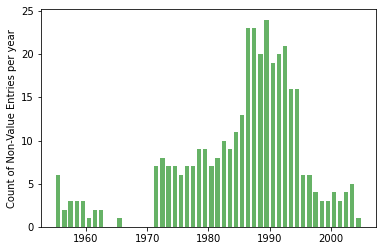

In [35]:
plt.ylabel("Count of Non-Value Entries per year")
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profit], bins=range(1955, 2006), \
                           color=['green'], alpha=0.6, rwidth=0.7)

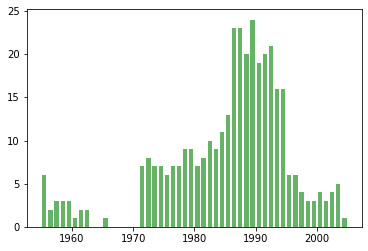

In [36]:
plt.hist(df.year[non_numberic_profit], bins=range(1955, 2006), color=['green'], alpha=0.6, rwidth=0.7);

- we can see that the most invalid values in a single year is fewer than 25
- there are 500 data points per year
- Removing these values would account for less than 4% of the data for the worst years.
- Indeed, other than a surge around the 90s, most years have fewer than half the missing values of the peak. 
- For our purposes, let's say this is acceptable and go ahead and remove these rows.

In [37]:
df = df.loc[~non_numberic_profit]

In [38]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [39]:
df.profit = df.profit.apply(pd.to_numeric)

In [40]:
# check the work
len(df)

25131

In [41]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

- data type for profit is float now

## 4. Drop duplicate samples from the given dataset

In [42]:
df = pd.read_csv('../input/lab06-demo-dataset/lab06_data.txt', sep=',')
df

,first,second,third,fourth,fifth,sixth
0,10.0,100.0,200,NaN,400.0,500
1,11.0,102.0,203,305.0,410.0,505
2,NaN,104.0,210,308.0,414.0,514
3,13.0,110.0,202,313.0,NaN,520
4,12.0,NaN,207,300.0,400.0,500
5,15.0,100.0,210,305.0,408.0,520
6,20.0,118.0,212,325.0,417.0,535
7,21.0,121.0,222,333.0,444.0,555
8,20.0,118.0,212,325.0,417.0,535
9,21.0,121.0,222,333.0,444.0,555


In [43]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9     True
dtype: bool

In [44]:
df.duplicated().sum()

2

In [45]:
df.drop_duplicates()
df

,first,second,third,fourth,fifth,sixth
0,10.0,100.0,200,NaN,400.0,500
1,11.0,102.0,203,305.0,410.0,505
2,NaN,104.0,210,308.0,414.0,514
3,13.0,110.0,202,313.0,NaN,520
4,12.0,NaN,207,300.0,400.0,500
5,15.0,100.0,210,305.0,408.0,520
6,20.0,118.0,212,325.0,417.0,535
7,21.0,121.0,222,333.0,444.0,555
8,20.0,118.0,212,325.0,417.0,535
9,21.0,121.0,222,333.0,444.0,555


## Ohhhhhh
- The duplicate samples were not removed
## ???

In [46]:
df.drop_duplicates(inplace=True)
df

,first,second,third,fourth,fifth,sixth
0,10.0,100.0,200,NaN,400.0,500
1,11.0,102.0,203,305.0,410.0,505
2,NaN,104.0,210,308.0,414.0,514
3,13.0,110.0,202,313.0,NaN,520
4,12.0,NaN,207,300.0,400.0,500
5,15.0,100.0,210,305.0,408.0,520
6,20.0,118.0,212,325.0,417.0,535
7,21.0,121.0,222,333.0,444.0,555


In [47]:
len(df)

8

## Tasks
1. Do you know about any other method to handle missing values?
2. How to perform data scaling?